# Food Imports Project

Suppose we are a company interested in the consumption patterns and business use of different food groups in th United States. Suppose we want to predict the total import value of different food groups for next year.

We can use the food imports data provided by the USDA to build a model to make predictions.


Note: This is a work in progress.

In [29]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


We will be working on the USDA Food imports dataset.

In [30]:
data_values = pd.read_csv('MyFoodImports - ValueFoodImports.csv')

In [31]:
data_volumes = pd.read_csv('MyFoodImports - VolumeFoodImports.csv')

In [32]:
import os

In [33]:
os.listdir()

['FoodImportsNotebook.ipynb',
 '.DS_Store',
 'FoodImports.xlsx',
 'MyFoodImports - VolumeFoodImports.csv',
 'FoodImportsNotebook-Copy1.ipynb',
 '.ipynb_checkpoints',
 'MyFoodImports - ValueFoodImports.csv']

In [34]:
data_values.head()

,year,group,group_type,value,unit
0,2022,U.S. imports,Total foods 1/,"199,835.80",dollars_millions
1,2022,Live meat animals,Foods,"2,509.60",dollars_millions
2,2022,Meats,Foods,"14,055.40",dollars_millions
3,2022,Fish and shellfish 2/,Foods,"30,525.50",dollars_millions
4,2022,Dairy,Foods,"2,721.40",dollars_millions


In [35]:
mask = data_values['group'] == 'U.S. imports'

In [36]:
data_values[mask]

,year,group,group_type,value,unit
0,2022,U.S. imports,Total foods 1/,"199,835.80",dollars_millions
17,2021,U.S. imports,Total foods 1/,"174,144.80",dollars_millions
34,2020,U.S. imports,Total foods 1/,"147,631.00",dollars_millions
51,2019,U.S. imports,Total foods 1/,"142,987.40",dollars_millions
68,2018,U.S. imports,Total foods 1/,"140,916.90",dollars_millions
85,2017,U.S. imports,Total foods 1/,"132,511.30",dollars_millions
102,2016,U.S. imports,Total foods 1/,"125,437.80",dollars_millions
119,2015,U.S. imports,Total foods 1/,"123,350.70",dollars_millions
136,2014,U.S. imports,Total foods 1/,"121,825.00",dollars_millions
153,2013,U.S. imports,Total foods 1/,"111,777.70",dollars_millions


### What does this dataset represent?

The prices are not adjusted for inflation.

Volume units given, for live animals, fowl are excluded.

### Data Source Flow Chart

Our dataset comes from the USDA. Each category of food is found in the USDA food availability data set. The USDA took the imprt data from each country and aggregated it into total import value for each food group. our dataset also has subtotals, aggregated by the USDA, by food type.

https://www.census.gov/foreign-trade/reference/guides/tradestatsinfo.html

https://www.ers.usda.gov/data-products/u-s-food-imports/documentation/

In [37]:
data_totals = data_values[mask].copy()

In [38]:
data_totals.head()

,year,group,group_type,value,unit
0,2022,U.S. imports,Total foods 1/,"199,835.80",dollars_millions
17,2021,U.S. imports,Total foods 1/,"174,144.80",dollars_millions
34,2020,U.S. imports,Total foods 1/,"147,631.00",dollars_millions
51,2019,U.S. imports,Total foods 1/,"142,987.40",dollars_millions
68,2018,U.S. imports,Total foods 1/,"140,916.90",dollars_millions


In [39]:
data_totals = data_totals[['year','value']]

In [40]:
data_totals['year'] = pd.to_datetime(data_totals['year'],format = '%Y')

In [41]:
data_totals.index = pd.DatetimeIndex(data_totals['year'])

In [42]:
data_totals.drop(['year'],inplace = True,axis = 1)

In [43]:
data_totals['value'] = data_totals['value'].str.replace(',','')

In [44]:
data_totals['value'] = data_totals['value'].astype('float')

In [45]:
data_totals.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 24 entries, 2022-01-01 to 1999-01-01
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   value   24 non-null     float64
dtypes: float64(1)
memory usage: 384.0 bytes


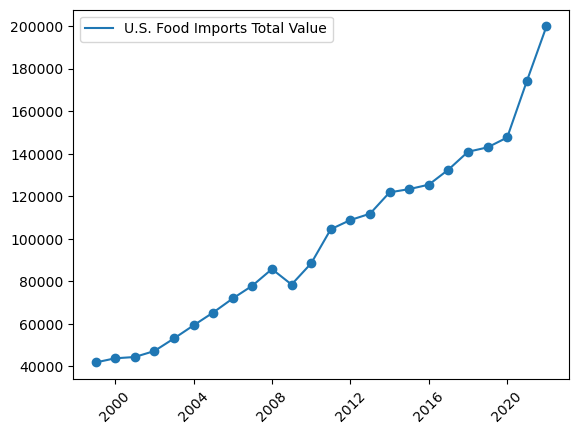

In [46]:
fig, ax = plt.subplots()

ax.tick_params(axis='x', labelrotation=45)

ax.plot(data_totals.index,data_totals['value'],label = 'U.S. Food Imports Total Value')
ax.scatter(data_totals.index,data_totals['value'])

ax.legend()

plt.show()

We will first implement single exponential smoothing and double exponential smoothing.

In [216]:
def MySingleExpSmoother(X,alpha):

    S = []
    
    S.append(X[0])
    
    for i in range(1,len(X)):
        
        S.append( X[i]*alpha + (1-alpha)*S[i-1]) #S_i = X_i*alpha + (1-alpha)*S_(i-1),
                                                 # i runs through [1..len(A)-1].
            
    return S #Returns the smoothed out data.
        
        
    



$y_{t|t-1} = l_{t-1}$, where $l_{t-1}$ is our smoothed out data.

In [50]:
def BackPredict(X,S):
    predictions = []
    predictions.append(np.nan)
    for i in range(1,len(X)):
        predictions.append(S[i-1])  #S[i-1] is l_(i-1)
    
    return predictions
    

In [51]:
S = MySingleExpSmoother([1,2,2,3],0.8)

In [52]:
BackPredict(X,S)

[nan, 1, 1.8, 1.96]

In [53]:
def NextPredict(X,S):
    return S[len(S) - 1]
    

We want to write a class that bundles all of the functions, and a mse function and a mae function.

and compares against baseline. and makes graphs.

Exponetial smoother app.

In [72]:
X = data_totals['value'].sort_index()

In [160]:
S = MySingleExpSmoother(X,1)

In [161]:
Y = BackPredict(X,S)

In [114]:
X.index.max().year

2022

In [135]:
T = pd.date_range(X.index.min(), freq="Y", periods= X.index.max().year - X.index.min().year + 2).year

1999

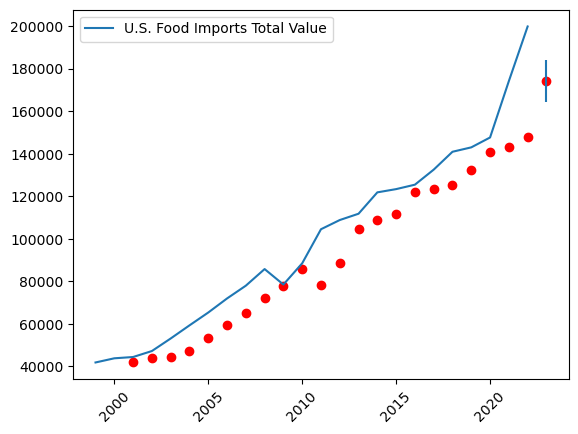

In [213]:
fig, ax = plt.subplots()

ax.tick_params(axis='x', labelrotation=45)

ax.plot(X.index.year,X.values,label = 'U.S. Food Imports Total Value')
# ax.scatter(data_totals.index,data_totals['value'])


# ax.scatter(X.index.year,S)

ax.scatter(T.values[1:],Y,color = 'r')

ax.vlines(2023,Y[-1]-10000,Y[-1]+10000)

ax.legend()

plt.show()

Write optimizer.

Now we want to create an optimizer which finds the alpha value that minimizes the MSE between $\hat{y}_{t|t-1}$ and
$y_t$

In [212]:
X = data_totals['value'].sort_index()
S = MySingleExpSmoother(X,1)
Y = BackPredict(X,S)







In [168]:
for i in np.arange(0,1,0.9):
    print(i)

0.0
0.9


In [185]:
A = list(enumerate([10,20,30],start = 1))

In [250]:
def MyOptimizer(data,gran):
    scores = []
    
    
    
    
    for alpha in np.arange(0,1,gran):
        S = MySingleExpSmoother(data,alpha)
    
        score = (1/len(data[1:]))* ((data[1:] - BackPredict(data,S)[1:])@(data[1:] - BackPredict(data,S)[1:]))**2
        
        scores.append(score)
        
    
    
    m = min(scores)
    
    A = [index for index in range(len(scores)) if scores[index] == m   ]
    
    return A[0]*gran
    
    
    

In [251]:
MyOptimizer(X,0.01) 

0.99

In [199]:
A = [10,2,10,3]
M = max(A)

In [201]:
[index for index in range(0,len(A)) if A[index] == M   ]

[0, 2]

In [257]:
d = np.array([np.sin(i) for i in np.arange(0,10,0.1)])

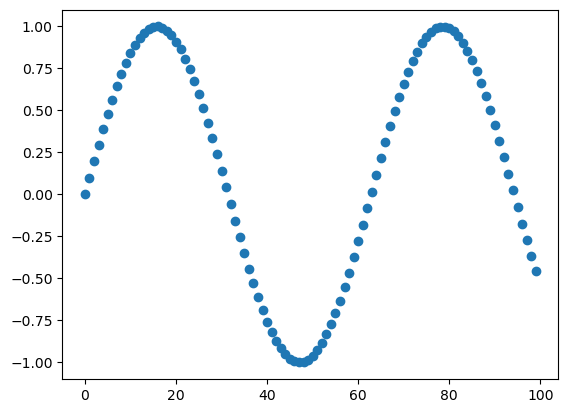

In [223]:
plt.scatter(np.arange(len(d)),d)

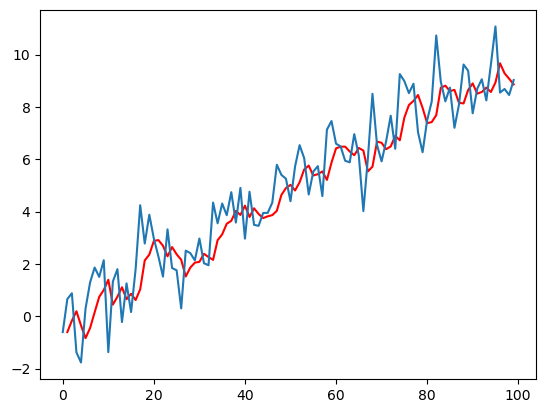

In [275]:
plt.plot(np.arange(len(d)),BackPredict(d,MySingleExpSmoother(d,0.34400)),color = 'r')
plt.plot(np.arange(len(d)),d)

In [273]:
MyOptimizer(d,0.001)

0.34400000000000003

In [271]:
d = 0.1*np.arange(100) + np.random.normal(0,1,100)

NameError: name 'D' is not defined

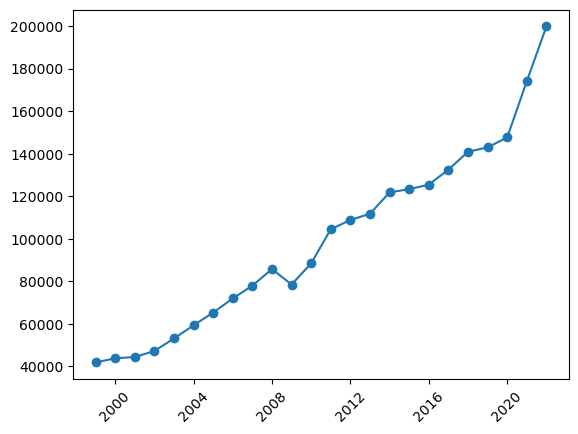

In [217]:
fig, ax = plt.subplots()

ax.tick_params(axis='x', labelrotation=45)

ax.plot(data_totals.index,data_totals['value'],label = 'U.S. Food Imports Total Value')
ax.scatter(data_totals.index,data_totals['value'])


ax.plot(data_totals.index,D,label = 'ewma 0.9')
ax.scatter(data_totals.index,D)

ax.legend()

plt.show()

In [ ]:
D = data_totals['value'].ewm(alpha = 0.9,adjust = False).mean()

In [ ]:
df = data_totals.copy()

In [ ]:
df.sort_index(inplace = True)

In [ ]:
def my_ewma(S,alpha):
    A = []
    
    
    
    A.append(S[0])
    
    i = 1
    while i < len(S):
        
        A.append(S[i]*alpha + A[i-1]*(1-alpha)  )
        
        i += 1
        
        
    return A
    
    
    
    
    

In [ ]:
my_ewma([2,3,4,5],0.4)

In [ ]:
def my_mse_ewma(S,A):
    A = np.array(A)
    S = np.array(S)
    
    RA = np.roll(A,1)
    
    R = RA - S
    
    R = R[1:]
    
    SSE = R@R.T
    
    
    return SSE
    
    

In [ ]:
def find_best_alpha(S,gran):
    
    
    
    
    
    space = np.arange(0,1,gran)

    scores = []
    
    
    for alpha in space:
        A = my_ewma(list(S),alpha)
        
        
        
        
        SSE = my_mse_ewma(list(S),A)
        
        scores.append(SSE)
        
        
    
    
    m = scores.index(min(scores))
    
    print(len(space))
    print(len(scores))
    
    
    plt.scatter(space,scores)

    plt.show()
    
    
    return space[m]
        
    
    
    
    
    
    
    
    
    
    
    
    

In [ ]:
find_best_alpha([1,3,2,6,4,7,4],0.05)

In [ ]:
df.values

In [ ]:
df.values.flatten()

In [ ]:
find_best_alpha(df.values.flatten(),0.05)

In [ ]:
plt.scatter(df.index,my_ewma(df.values.flatten(),0.9))

In [ ]:
plt.scatter(np.arange(len(d)),u,color = 'r')


plt.scatter(np.arange(len(d)),d)

In [ ]:
u = np.random.uniform(10,30,100)

d = my_ewma(u,1)

In [ ]:
find_best_alpha(u,0.01)